## Regression (Neural Network predicting a number)

Imports

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Synthetic linear data

In [27]:
tf.random.set_seed(42)

X = tf.range(-20, 22, 2, dtype=tf.float32)   # creates numbers from -20 to 20 with step 2
y = X + 10 # "right answer"

idx = tf.random.shuffle(tf.range(tf.shape(X)[0])) # shuffled indices
X_shuf = tf.gather(X, idx)
y_shuf = tf.gather(y, idx)


Train/test split (simple)

In [ ]:
n = int(tf.shape(X)[0])
split = int(0.8 * n) # 80% for training, 20% for testing
X_train, y_train = X_shuf[:split], y_shuf[:split] 
X_test, y_test = X_shuf[split:], y_shuf[split:]

tf.Tensor(
[[  0.  10.]
 [-20. -10.]
 [-16.  -6.]
 [ 10.  20.]
 [-12.  -2.]], shape=(5, 2), dtype=float32)


Create model

In [29]:
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(1,)),
 tf.keras.layers.Dense(1) # linear output for regression
])

Compile(how to train model)

In [30]:
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["mae"]
)

Teach

In [31]:
history = model.fit(X_train, y_train, epochs=600, verbose=0)

Predict and visualize

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


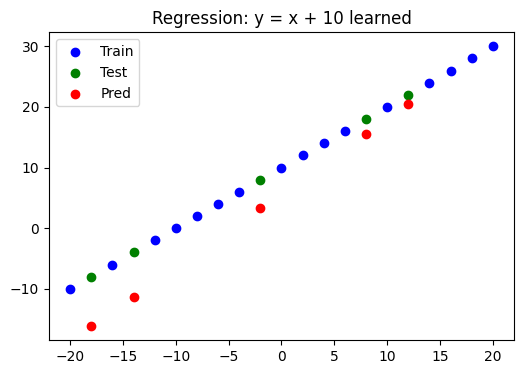

In [32]:
y_pred = model.predict(X_test).squeeze()
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='g', label='Test')
plt.scatter(X_test, y_pred, c='r', label='Pred')
plt.legend(); plt.title("Regression: y = x + 10 learned")
plt.show()

- At first, the model predicted a value around 14, which was not correct.
- I increased the number of epochs to 600, and the result improved but was still not perfect.
- Then I tried using the Adam optimizer, but the prediction was still slightly inaccurate, so I returned to SGD.
- After shuffling the data and adding more prediction points to the graph, the model’s predictions became close to the true values.
- I think it can be count as a success.